In [1]:
from google.colab import drive  # to mount Drive to Colab notebook
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [3]:
df = pd.read_csv('./gdrive/My Drive/Mawhiba/StudentsPerformance.csv')


In [4]:
df = df[['reading score','writing score', 'math score']]
df.head()

,reading score,writing score,math score
0,72,74,72
1,90,88,69
2,95,93,90
3,57,44,47
4,78,75,76


In [5]:
df.corr()

,reading score,writing score,math score
reading score,1.000000,0.954598,0.817580
writing score,0.954598,1.000000,0.802642
math score,0.817580,0.802642,1.000000


In [6]:
df.shape

(1000, 3)

In [7]:
df.dropna(inplace = True)
df.shape

(1000, 3)

Text(17.80000000000001, 0.5, 'Reading Score')

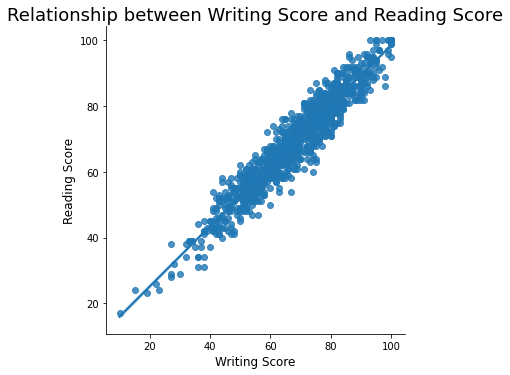

In [8]:
# Linear Regression Line of Writing Score and Reading Score
sns.lmplot(x = 'writing score', y = 'reading score', data = df)
plt.title('Relationship between Writing Score and Reading Score', size = 18)
plt.xlabel('Writing Score', size = 12)
plt.ylabel('Reading Score', size = 12)

Text(17.80000000000001, 0.5, 'Math Score')

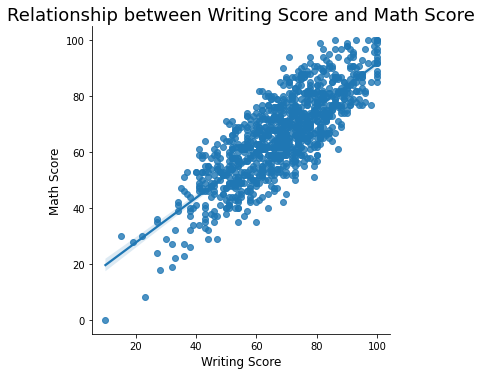

In [9]:
# Linear Regression Line of Writing Score and Math Score
sns.lmplot(x = 'writing score', y = 'math score', data = df)
plt.title('Relationship between Writing Score and Math Score', size = 18)
plt.xlabel('Writing Score', size = 12)
plt.ylabel('Math Score', size = 12)

Text(17.80000000000001, 0.5, 'Reading Score')

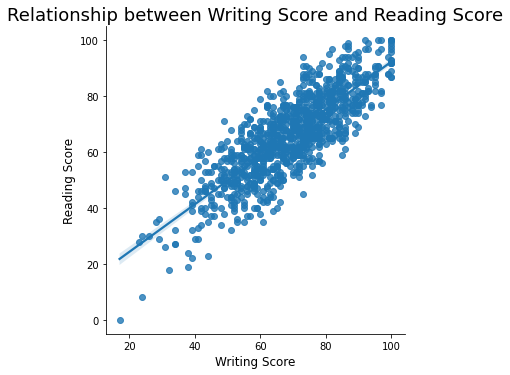

In [10]:
# Linear Regression Line of Writing Score and Reading Score
sns.lmplot(x = 'reading score', y = 'math score', data = df)
plt.title('Relationship between Writing Score and Reading Score', size = 18)
plt.xlabel('Writing Score', size = 12)
plt.ylabel('Reading Score', size = 12)

In [11]:
from sklearn.linear_model import LinearRegression
X = df[['writing score']]
y = df['reading score']
lr = LinearRegression()
lr.fit(X, y)
a = lr.coef_
b = lr.intercept_
print('ReadingScore = {:.2f} * WritingScore'\
      ' + {:.2f}'.format(a[0], b))

ReadingScore = 0.92 * WritingScore + 6.75


In [12]:
X = df[['writing score','reading score']]
y = df['math score']
r = LinearRegression()
lr.fit(X, y)
a = lr.coef_
b = lr.intercept_
print('Math_score = {:.2f} * Writing_score'\
      ' + {:.2f} * Reading_score + {:.2f}'\
      .format(a[0],a[1], b))

Math_score = 0.25 * Writing_score + 0.60 * Reading_score + 7.52


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['writing score']]
y = df['reading score']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

lr = LinearRegression()
lr.fit(train_X, train_y)
val_prediction = lr.predict(val_X)
a = lr.coef_
b = lr.intercept_

print('ReadingScore = {:.2f} * WritingScore + {:.2f}'.format(a[0],b))
print('Mean of Absolute Error (MEA) = '\
      '{:.2f}'.format(mean_squared_error(val_y, val_prediction)))

ReadingScore = 0.92 * WritingScore + 6.21
Mean of Absolute Error (MEA) = 19.49
